<a href="https://colab.research.google.com/github/NeZorinEgor/MachineVision-Learning/blob/main/Adaptive_cross-linking_of_textons/%D0%90%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D1%81%D1%88%D0%B8%D0%B2%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://direct-file-upload.hostfl.ru/files/library.jpg
!wget http://direct-file-upload.hostfl.ru/files/lisa.jpg

--2024-03-28 09:22:11--  http://direct-file-upload.hostfl.ru/files/library.jpg
Resolving direct-file-upload.hostfl.ru (direct-file-upload.hostfl.ru)... 178.208.86.166
Connecting to direct-file-upload.hostfl.ru (direct-file-upload.hostfl.ru)|178.208.86.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7948 (7.8K) [image/jpeg]
Saving to: ‘library.jpg’

library.jpg         100%[===================>]   7.76K  --.-KB/s    in 0s      

2024-03-28 09:22:12 (17.9 MB/s) - ‘library.jpg’ saved [7948/7948]

--2024-03-28 09:22:12--  http://direct-file-upload.hostfl.ru/files/lisa.jpg
Resolving direct-file-upload.hostfl.ru (direct-file-upload.hostfl.ru)... 178.208.86.166
Connecting to direct-file-upload.hostfl.ru (direct-file-upload.hostfl.ru)|178.208.86.166|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101832 (99K) [image/jpeg]
Saving to: ‘lisa.jpg’

lisa.jpg            100%[===================>]  99.45K   229KB/s    in 0.4s    

2024-03-28 09:22

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

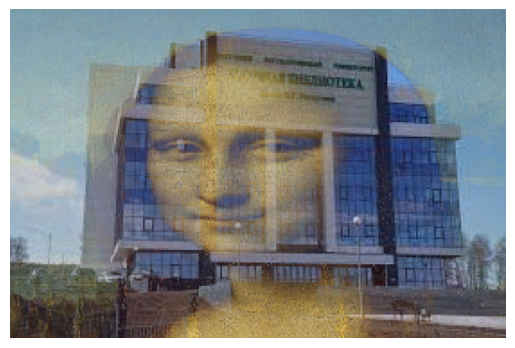

In [ ]:
def adaptive_blend(image1, image2):
    image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

    img1 = np.array(image1, dtype=np.float32)
    img2 = np.array(image2, dtype=np.float32)

    intensity1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    intensity2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    alpha = intensity1 / (intensity1 + intensity2)
    alpha = np.nan_to_num(alpha)

    result = np.zeros_like(img1)
    for c in range(result.shape[2]):
        result[:, :, c] = alpha * img1[:, :, c] + (1 - alpha) * img2[:, :, c]

    return result.astype(np.uint8)

image1 = cv2.imread('library.jpg')
image2 = cv2.imread('lisa.jpg')

blended_image = adaptive_blend(image1, image2)

plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
